---
### 3.2.1 矩阵的奇异值分解
矩阵的$F$（Frobenius）范数定义为：
$$
\begin{align*}
\left\|\bm A\right\|_F^2 &={\rm tr}\left( {\bm A^{\rm T}{\bm A}}{}\right)=\sum\limits_{i=0}^m\sum\limits_{j=0}^na_{ij}\\
&=\sum\limits_{i=1}^r\sigma_i^2
\end{align*}
$$
其中$\sigma_i(i=1, 2, \cdots, r)$为矩阵$\bm A$的奇异值


In [1]:
import numpy as np
from numpy.linalg import svd

A = np.array([[1, 0, 1], [0, 1, 1], [0, 0, 0]])
U, S, VT = svd(A)   # A = U @ np.diag(S) @ VT
U, S, VT

(array([[ 0.70710678, -0.70710678,  0.        ],
        [ 0.70710678,  0.70710678,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]),
 array([ 1.73205081,  1.        , -0.        ]),
 array([[ 4.08248290e-01,  4.08248290e-01,  8.16496581e-01],
        [-7.07106781e-01,  7.07106781e-01,  2.22044605e-16],
        [ 5.77350269e-01,  5.77350269e-01, -5.77350269e-01]]))

---
### 3.2.2 奇异值分解应用
#### 1. 推荐系统的评分

关键点：(1) 衡量菜品之间的相似性 (2) 评分估计

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [3]:
personNum, dishNum = 18, 11
data = np.loadtxt('../03第3章  线性代数模型/data3_6_1.txt')
normalizedCorrelation = 0.5 + np.corrcoef(data.T)*0.5  # np.corrcoef() 按行返回原矩阵(m*n)的相关系数矩阵(m*m)
df = pd.DataFrame(normalizedCorrelation, columns=range(dishNum), index=range(dishNum))
df

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.489284,0.467975,0.791976,0.404310,0.325795,0.400391,0.856481,0.462342,0.336848,0.391095
1,0.489284,1.000000,0.502885,0.435558,0.810442,0.444005,0.518443,0.421379,0.360927,0.257110,0.596787
2,0.467975,0.502885,1.000000,0.588485,0.467631,0.413355,0.870915,0.433675,0.668768,0.330570,0.423780
3,0.791976,0.435558,0.588485,1.000000,0.337045,0.313880,0.549917,0.894065,0.449812,0.316724,0.395215
4,0.404310,0.810442,0.467631,0.337045,1.000000,0.713322,0.434418,0.308094,0.408865,0.275784,0.781073
5,0.325795,0.444005,0.413355,0.313880,0.713322,1.000000,0.353900,0.303926,0.377961,0.550107,0.787522
6,0.400391,0.518443,0.870915,0.549917,0.434418,0.353900,1.000000,0.441356,0.804785,0.431585,0.368801
7,0.856481,0.421379,0.433675,0.894065,0.308094,0.303926,0.441356,1.000000,0.417031,0.316366,0.375711
8,0.462342,0.360927,0.668768,0.449812,0.408865,0.377961,0.804785,0.417031,1.000000,0.527263,0.444845
9,0.336848,0.257110,0.330570,0.316724,0.275784,0.550107,0.431585,0.316366,0.527263,1.000000,0.376580


In [4]:
recommand = np.zeros_like(data)
for i in  range(personNum):
    no = np.where(data[i, :] == 0)[0]
    yb = list(set(range(dishNum)) - set(no))
    for n in no:
        total = s = 0
        for y in yb:
            total += normalizedCorrelation[n][y]*data[i][y]
            s += normalizedCorrelation[n][y]
        recommand[i][n] = total/s
print(recommand)

[[0.         0.         0.         0.         2.73700968 2.83515551
  0.         0.         2.77503243 2.97835914 2.898083  ]
 [3.         3.         3.         3.         3.         3.
  3.         3.         3.         0.         3.        ]
 [0.         2.44834901 0.         0.         2.37439636 2.33377514
  0.         2.27125052 0.         2.53334453 0.        ]
 [3.44984703 0.         2.8542274  3.08190907 0.         3.5912627
  0.         3.22901708 2.69588527 2.9241396  3.70823369]
 [4.         4.         4.         4.         4.         0.
  4.         4.         4.         0.         4.        ]
 [2.11796922 1.80445049 0.         1.87064429 1.93658095 2.67033013
  0.         2.06216912 2.05409636 0.         2.288377  ]
 [0.         2.61274541 0.         0.         0.         0.
  2.56192057 0.         2.54300499 0.         2.33286152]
 [4.49389203 0.         4.49313246 4.49420343 0.         0.
  4.47937299 4.48527447 4.53604879 4.44695288 0.        ]
 [4.28080477 4.22623367 4

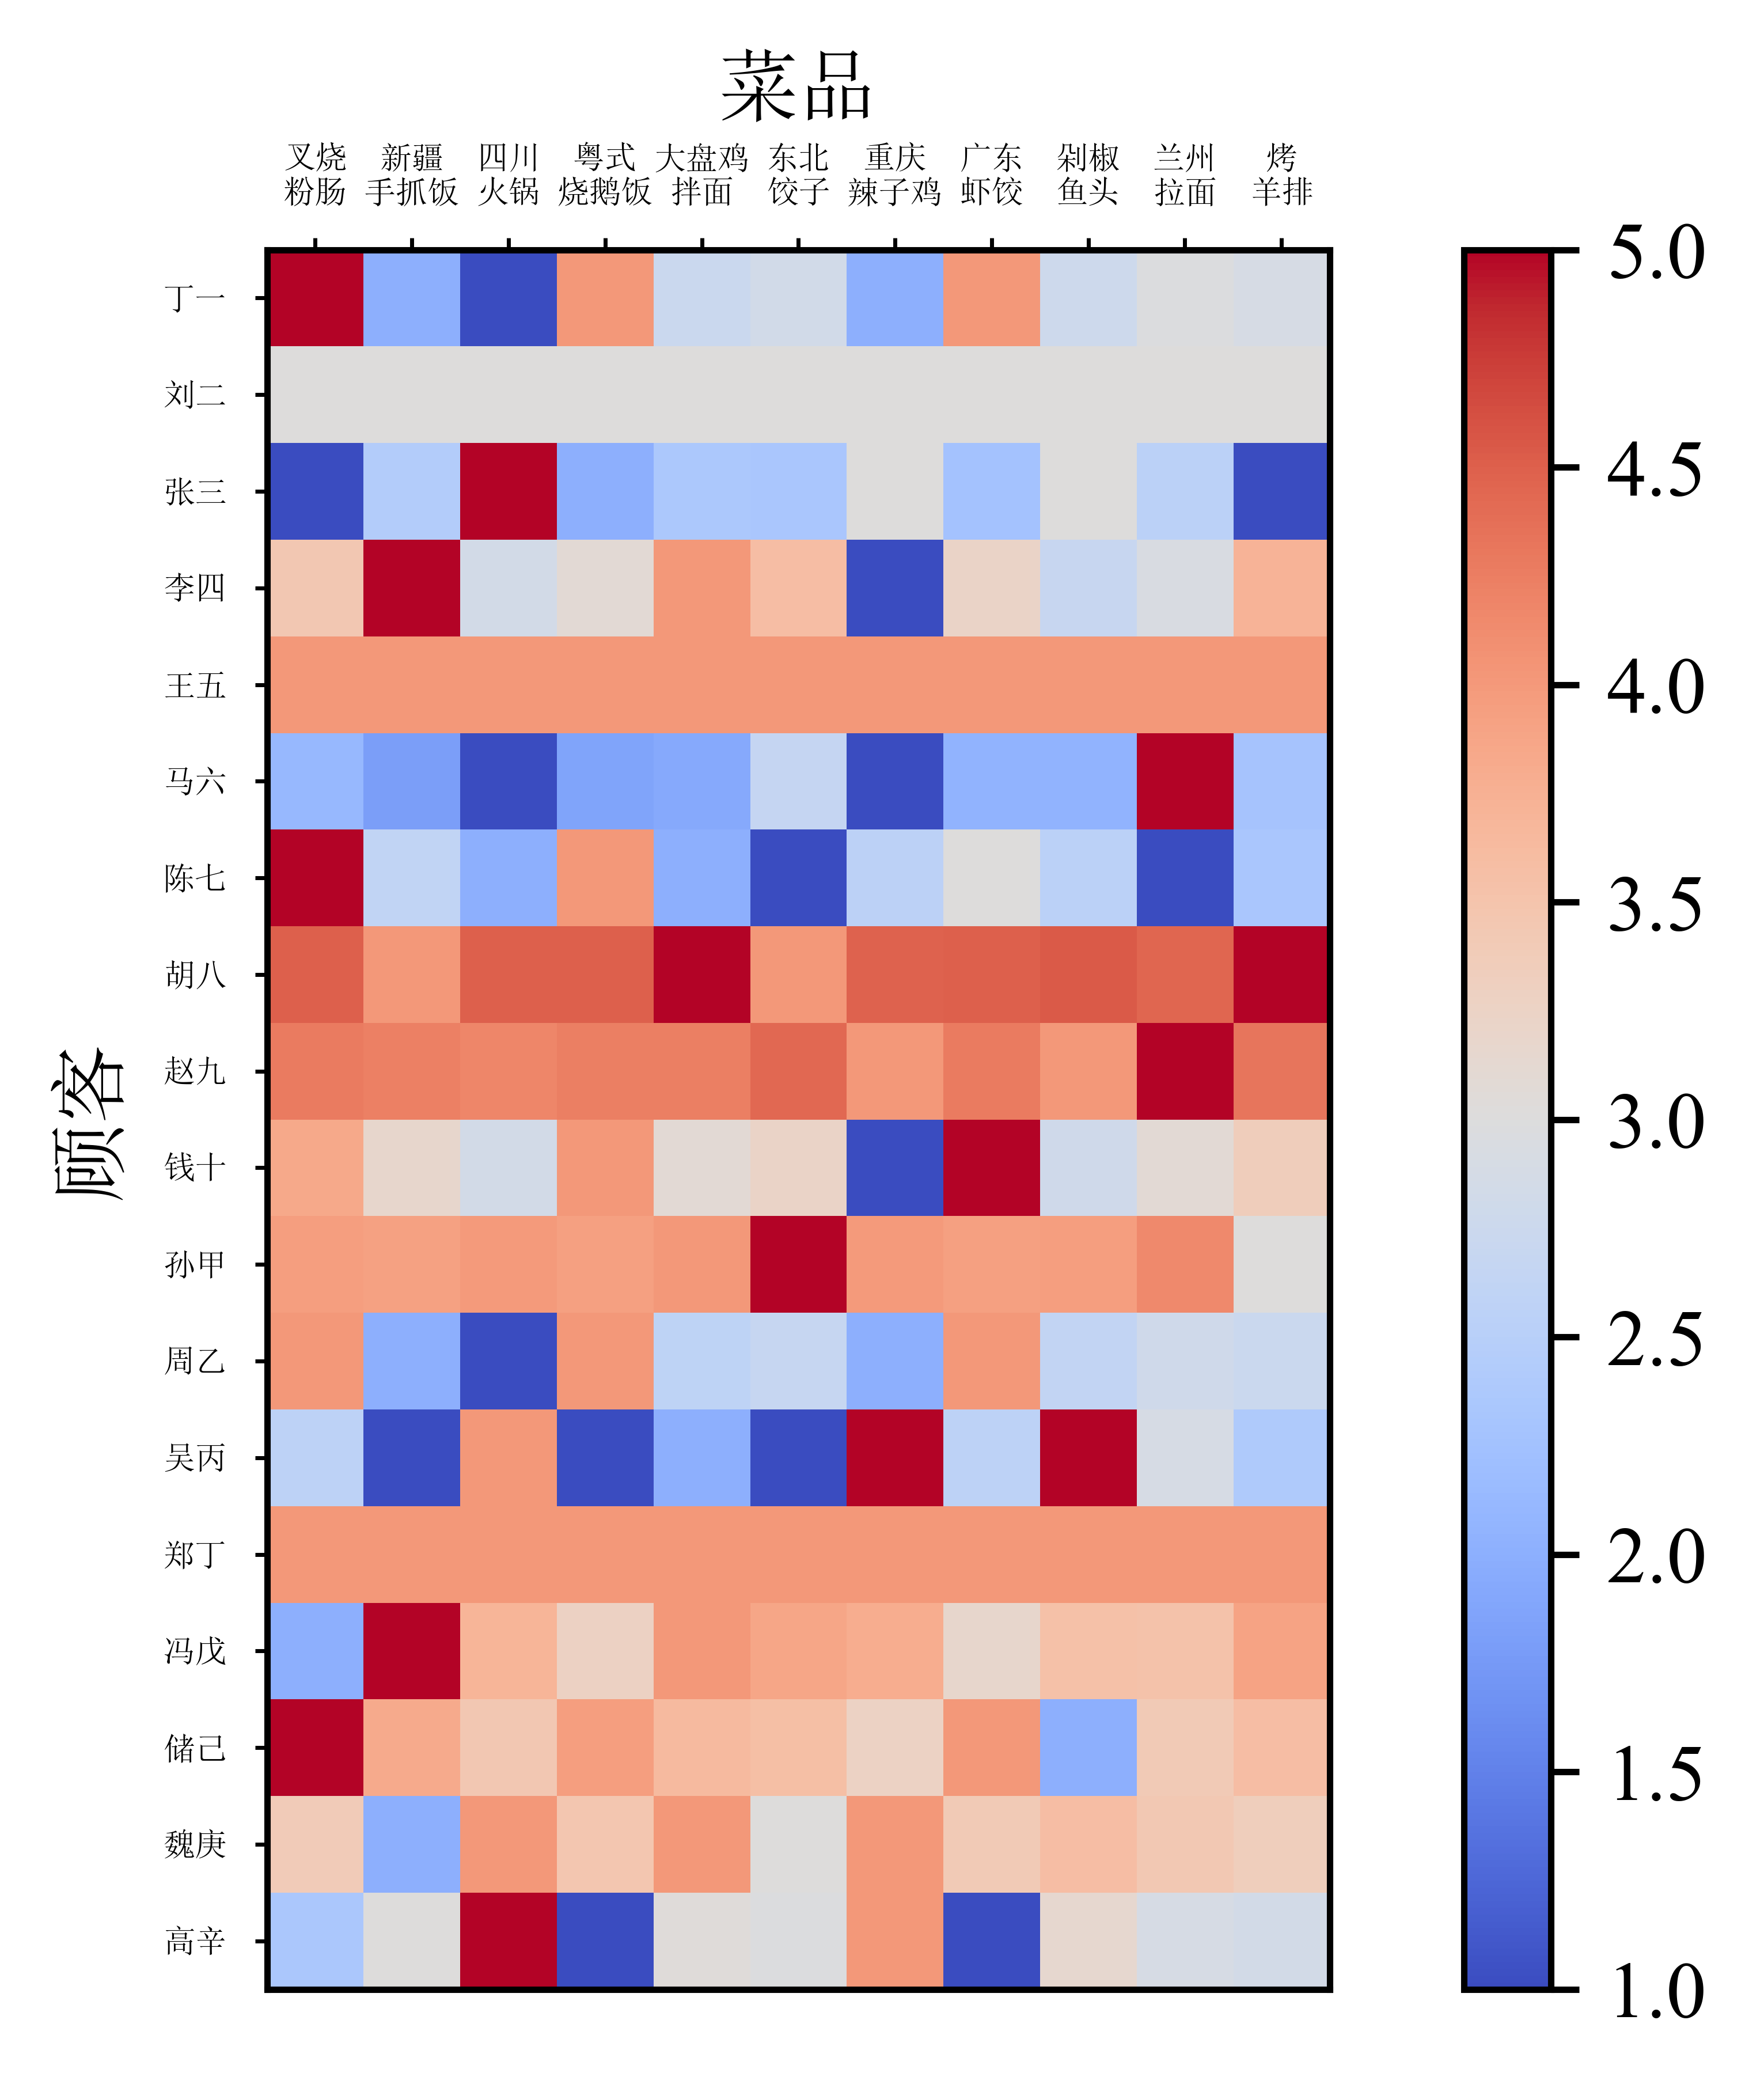

In [5]:
plt.rcParams['xtick.direction']='out'
plt.rcParams['ytick.direction']='out'

dishes = ['叉烧\n粉肠', '新疆\n手抓饭', '四川\n火锅', '粤式\n烧鹅饭', '大盘鸡\n拌面', '东北\n饺子', '重庆\n辣子鸡', '广东\n虾饺', '剁椒\n鱼头', '兰州\n拉面', '烤\n羊排']
customers = ['丁一', '刘二', '张三', '李四', '王五', '马六', '陈七', '胡八', '赵九', '钱十', '孙甲', '周乙', '吴丙', '郑丁', '冯戊', '储己', '魏庚', '高辛']

fin = recommand + data
fig = plt.figure(dpi=1000)
ax = fig.add_subplot(111)
cbar = ax.imshow(fin, cmap='coolwarm', interpolation='none')
ax.set_xlabel('菜品')
ax.set_ylabel('顾客')
ax.xaxis.tick_top() 
ax.xaxis.set_label_position('top')

from matplotlib.ticker import MultipleLocator
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(lambda x, pos: dishes[int(x)] if x in range(dishNum) else '')
ax.yaxis.set_major_formatter(lambda x, pos: customers[int(x)] if x in range(personNum) else '')
ax.tick_params(which='major', width=0.5, length=1.5, labelsize=4, labelcolor='k')
fig.colorbar(cbar)
fig.show()
#fig.savefig('./rec.jpg')

#### 基于奇异值分解压缩数据

* 稀疏矩阵降维处理
  
  奇异值越小，对矩阵的贡献越小。可以舍去那些较小的奇异值，从而减降低矩阵维数

In [6]:
data

array([[5., 2., 1., 4., 0., 0., 2., 4., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0.],
       [1., 0., 5., 2., 0., 0., 3., 0., 3., 0., 1.],
       [0., 5., 0., 0., 4., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 4., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 5., 0.],
       [5., 0., 2., 4., 2., 1., 0., 3., 0., 1., 0.],
       [0., 4., 0., 0., 5., 4., 0., 0., 0., 0., 5.],
       [0., 0., 0., 0., 0., 0., 4., 0., 4., 5., 0.],
       [0., 0., 0., 4., 0., 0., 1., 5., 0., 0., 0.],
       [0., 0., 0., 0., 4., 5., 0., 0., 0., 0., 3.],
       [4., 2., 1., 4., 0., 0., 2., 4., 0., 0., 0.],
       [0., 1., 4., 1., 2., 1., 5., 0., 5., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 4., 0.],
       [2., 5., 0., 0., 4., 0., 0., 0., 0., 0., 0.],
       [5., 0., 0., 0., 0., 0., 0., 4., 2., 0., 0.],
       [0., 2., 4., 0., 4., 3., 4., 0., 0., 0., 0.],
       [0., 3., 5., 1., 0., 0., 4., 1., 0., 0., 0.]])

In [7]:
from numpy.linalg import svd
U, S, VT = svd(data)
for i in range(len(S)):
    print(np.sum(S[:i+1]**2)/np.sum(S**2))

0.3681664621597079
0.5703177559711352
0.721185133277175
0.837344414614315
0.8951381043889782
0.9341700809743472
0.961189368871376
0.9758763740982027
0.9881409451467396
0.9951783378607707
1.0


In [8]:
# 保留列的稀疏矩阵降维范式
cs = np.cumsum(S**2)
rate = cs/cs[-1]
ind = np.where(rate>=0.9)[0][0] + 1
print(f'{ind = }')     #奇异值个数，满足信息提出率达到 90%
low_dim_data = np.diag(S[:ind]) @ U.T[:ind, :] @ data
low_dim_data

ind = 6


array([[-112.4308753 , -112.87222698, -124.19623361, -105.3993477 ,
        -111.288632  ,  -73.59389971, -135.0414711 , -100.44297783,
         -64.70437823,  -40.78142832,  -36.26815254],
       [ -72.48369701,   41.51056586,    2.73164141,  -63.4068466 ,
          80.85031966,   74.17305344,    5.56275757,  -78.96337678,
           0.5442874 ,   22.36535334,   43.68006783],
       [  37.12342785,   37.62324399,  -48.30321076,   12.27825448,
          44.01558208,   15.58603044,  -61.15421157,   29.1271841 ,
         -51.75734522,  -48.33639061,   24.5927832 ],
       [  17.52124987,  -26.0972729 ,  -31.74323843,    6.7731707 ,
          -9.84514566,   43.42277156,  -20.38567072,   17.78646057,
          -3.58400334,   75.2486827 ,    6.44560751],
       [  -4.65216236,  -30.40184468,   14.31575194,    8.88222668,
          -3.18752866,   25.17373196,   -2.36071622,    3.80908229,
           0.60261906,  -21.93806491,   14.73475607],
       [  12.3915557 ,   -6.28064351,  -10.8104197

In [9]:
norms = np.linalg.norm(low_dim_data, axis=0, keepdims=True)
cos_sim = (low_dim_data.T @ low_dim_data) / (norms.T @ norms)
nm_cos_sim = 0.5*cos_sim + 0.5
nm_cos_sim

array([[1.        , 0.78712889, 0.78873282, 0.9817032 , 0.70146433,
        0.6238851 , 0.78837146, 0.99385244, 0.72813517, 0.58698874,
        0.60787638],
       [0.78712889, 1.        , 0.84920274, 0.78339067, 0.96611788,
        0.82589181, 0.84771267, 0.74513401, 0.730485  , 0.58953488,
        0.86306565],
       [0.78873282, 0.84920274, 1.        , 0.85868542, 0.80240006,
        0.73534984, 0.99221173, 0.78337809, 0.93312301, 0.66863165,
        0.68995526],
       [0.9817032 , 0.78339067, 0.85868542, 1.        , 0.69355824,
        0.63035731, 0.84827672, 0.98940137, 0.77231249, 0.60310978,
        0.59170177],
       [0.70146433, 0.96611788, 0.80240006, 0.69355824, 1.        ,
        0.92279325, 0.79903869, 0.65321212, 0.70536221, 0.61737892,
        0.96075029],
       [0.6238851 , 0.82589181, 0.73534984, 0.63035731, 0.92279325,
        1.        , 0.7413467 , 0.59249204, 0.68530452, 0.77470003,
        0.96020569],
       [0.78837146, 0.84771267, 0.99221173, 0.84827672, 0.

In [10]:
svd_recommand = np.zeros_like(data)
for i in  range(personNum):
    no = np.where(data[i, :] == 0)[0]
    yb = list(set(range(dishNum)) - set(no))
    for n in no:
        total = s = 0
        for y in yb:
            total += nm_cos_sim[n][y]*data[i][y]
            s += nm_cos_sim[n][y]
        svd_recommand[i][n] = total/s
print(svd_recommand)

[[0.         0.         0.         0.         2.86562268 2.8632744
  0.         0.         2.87246377 2.92026855 2.86173519]
 [3.         3.         3.         3.         3.         3.
  3.         3.         3.         0.         3.        ]
 [0.         2.50928177 0.         0.         2.4824345  2.46809865
  0.         2.47353718 0.         2.58310347 0.        ]
 [3.3069785  0.         3.19531706 3.24246513 0.         3.43850182
  0.         3.2710659  3.1035726  3.17377192 3.53021174]
 [4.         4.         4.         4.         4.         0.
  4.         4.         4.         0.         4.        ]
 [2.08496028 2.03135394 0.         2.04431343 2.1129872  2.37639018
  0.         2.08396486 2.15086263 0.         2.22573933]
 [0.         2.58738548 0.         0.         0.         0.
  2.59324174 0.         2.56424823 0.         2.402635  ]
 [4.4813125  0.         4.48501787 4.47619719 0.         0.
  4.48202544 4.47620072 4.48195732 4.47261228 0.        ]
 [4.27905397 4.27195923 4

#### 2. 利用 SVD 进行图像压缩
用$k$个大奇异值及与之对应的左和右奇异向量逼近原图像，便可以用$m\times k+k+k\times n=k(m+n+1)$个数值代替原来的$m\times n$个数据，压缩比率为$$\rho=\left(1-\dfrac{k(m+n+1)}{mn} \times 100\% \right) $$

在接收端，接收到奇异值$\sigma_1, \sigma_2, \cdots, \sigma_k$以及左奇异向量$\bm u_1, \bm u_2, \cdots, \bm u_k$和右奇异向量$\bm v_1, \bm v_2, \cdots, \bm v_k$后，即可通过以下的奇异值分解公式重构出原图像：$$\hat {\bm A}=\sum\limits_{i=1}^k \sigma_i \bm u_i \bm v_i^{\rm T}$$

In [11]:
import numpy as np
from numpy import linalg as LA
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [12]:
pic = Image.open('../03第3章  线性代数模型/Lena.bmp')
if pic.mode != 'L':
    pic =  pic.convert('L')     # 转换为灰度图像
pix = np.array(pic).astype(float)
pix
U, S, VT = LA.svd(pix)

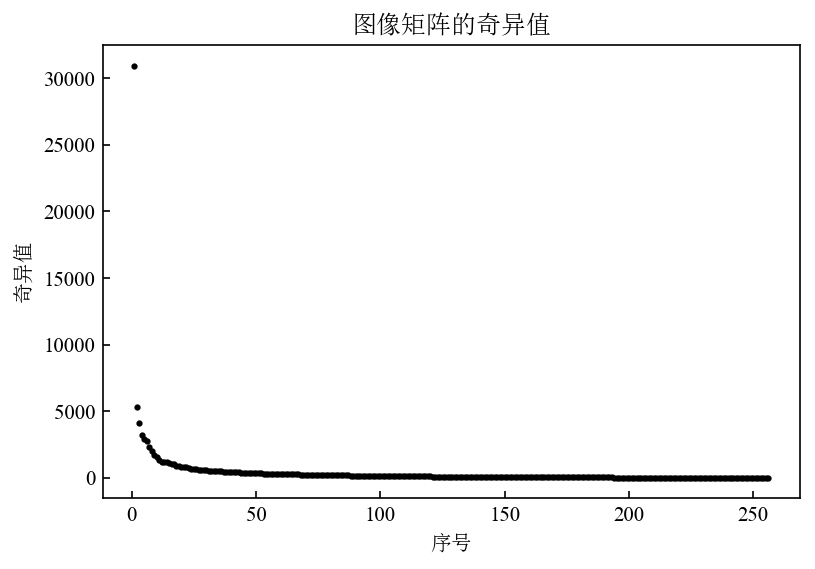

In [13]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111)
ax.plot(np.arange(1, len(S)+1), S, 'k.', markersize=4)
ax.set_xlabel('序号')
ax.set_ylabel('奇异值')
ax.set_title('图像矩阵的奇异值')
fig.show()

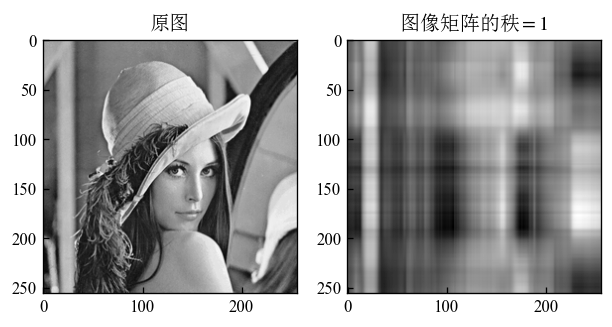

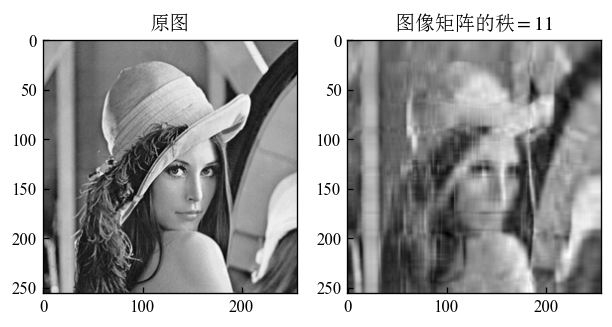

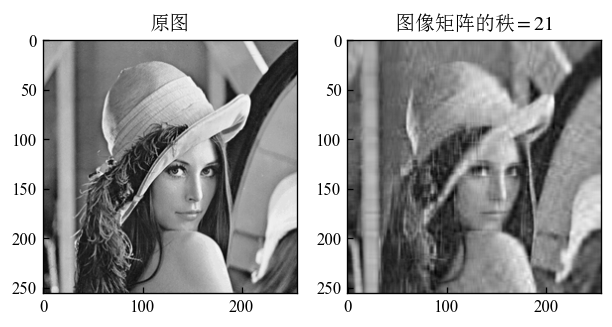

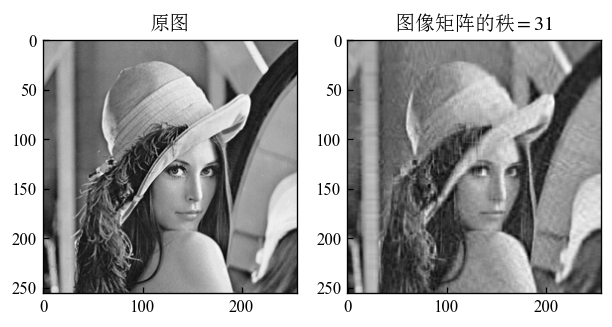

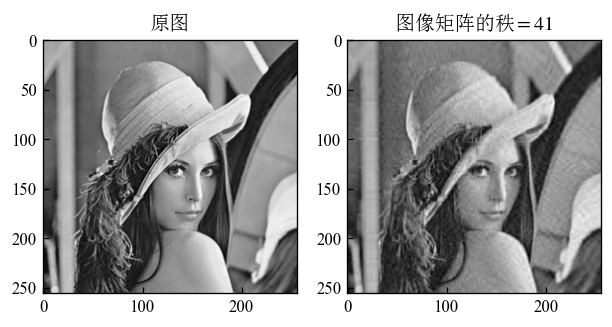

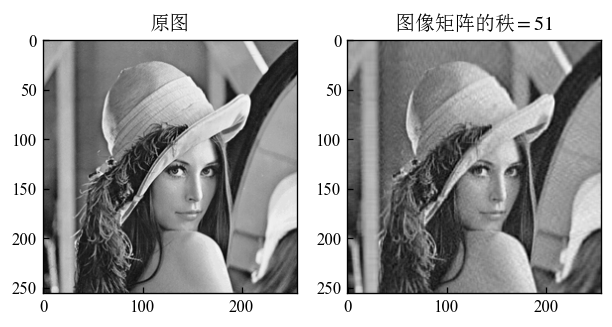

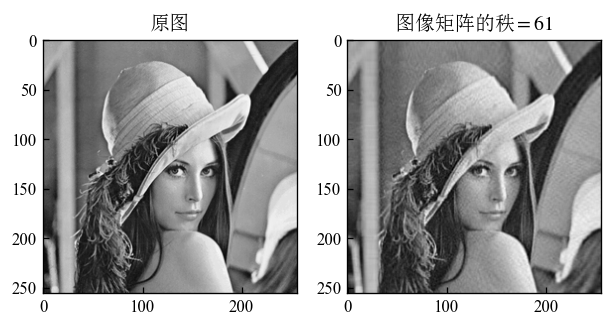

In [14]:
m, n = pix.shape
rank = LA.matrix_rank(pix)
CR = []
for K in range(1, int(rank/4), 10):
    fig = plt.figure(K, dpi=120)
    ax = fig.add_subplot(121)
    ax.set_title('原图')
    ax.imshow(pix, cmap='gray')
    I = U[:, :K+1] @ np.diag(S[:K+1]) @ VT[:K+1, :]
    ax1 = fig.add_subplot(122)
    ax1.set_title('图像矩阵的秩'+rf'$={K}$')
    ax1.imshow(I, cmap='gray')
    src = m*n
    compress = K*(m+n+1)
    rho = (1 - compress/src)*100
    CR.append(rho)

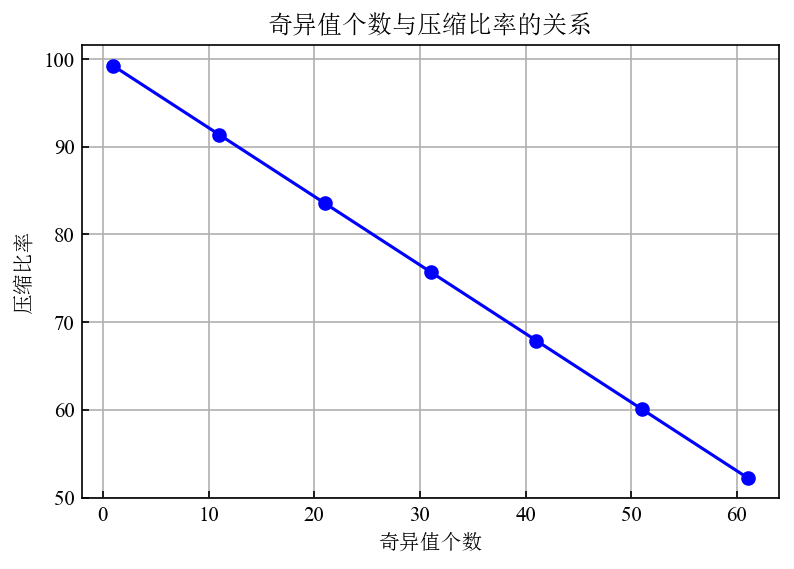

In [15]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111)
ax.plot(range(1, int(rank/4), 10), CR, 'ob-')
ax.set_title("奇异值个数与压缩比率的关系")
ax.set_xlabel("奇异值个数")
ax.set_ylabel("压缩比率")
ax.grid()
fig.show()